# 0 – Instalación de librerías

En esta celda se instalan las librerías necesarias para ejecutar el notebook. Se incluyen:

* **Roboflow**: útil para gestionar datasets de visión por computadora.
* **Ultralytics**: contiene la implementación oficial de YOLOv8.

In [ ]:
!pip install roboflow ultralytics

  Using cached roboflow-1.2.7-py3-none-any.whl.metadata (9.7 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

# 1 – Importaciones
Aquí se importan las librerías principales que se utilizarán a lo largo del notebook:

* `YOLO`: clase para cargar, entrenar y usar modelos YOLOv8.
* `matplotlib`: para graficar resultados.
* `math`: para operaciones matemáticas (ejemplo: cálculo de grillas).
* `%matplotlib inline`: permite mostrar gráficos dentro del notebook.

In [23]:
from ultralytics import YOLO

import matplotlib.pyplot as plt
import math

%matplotlib inline


# 2 – Cargar modelo pre-entrenado

Se carga el modelo **YOLOv8n** (nano), que es la versión más ligera y rápida de YOLOv8.
Este modelo servirá como base para realizar **transfer learning** con nuestro dataset personalizado.

In [ ]:
model = YOLO("yolov8n.pt")

# 3 – Entrenamiento

En esta celda se entrena el modelo YOLOv8 con el dataset personalizado.
Se especifica el archivo `data.yaml`, que contiene información sobre las clases y la estructura de las imágenes (train, val, test).

* `epochs=15`: número de iteraciones completas sobre el dataset.
* `imgsz=640`: tamaño de las imágenes de entrada.

In [4]:
data_path = "/Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/data.yaml"

result = model.train( data = data_path,
                     epochs=15,
                     imgsz=640)

Ultralytics 8.3.190 🚀 Python-3.13.0 torch-2.8.0 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

# 4 – Carga de modelo entrenado

Una vez entrenado el modelo, se carga el archivo `best.pt`.
Este archivo corresponde al modelo con **mejor desempeño** durante el entrenamiento (según la métrica mAP).

In [5]:
modelo_entrenado = YOLO("/Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/runs/weights/best.pt")

# 5 – Predicciones sobre el conjunto de prueba

En esta celda se realizan predicciones con el modelo entrenado sobre todas las imágenes del **conjunto de prueba** (`test/images`).

In [6]:
predicciones = modelo_entrenado("/Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/test/images")


image 1/17 /Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/test/images/2657959200_3e3f82ab03_w_jpg.rf.99a3d6cf92474d0589eb3d3461b6895d.jpg: 640x640 1 placa_carro, 97.3ms
image 2/17 /Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/test/images/2665001685_d2d711fec1_w_jpg.rf.bfa74a3099e181e1131235b22f9bab6a.jpg: 640x640 1 placa_carro, 87.8ms
image 3/17 /Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/test/images/2665823596_47018de3b1_w_jpg.rf.9501105d67596192fbe463d57012c7a6.jpg: 640x640 1 placa_carro, 69.7ms
image 4/17 /Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/test/images/2680077769_74c6c520ec_w_jpg.rf.979a370d30720abf5eabbe57f0a6bb09.jpg: 640x640 1 placa_carro, 60.2ms
image 5/17 /Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/test/images/2721842583_80ecd8a1a8_jpg.rf.4b76bf7f576e9af058c83191e884a2bf.jpg: 640x640 1 p

# 6 – Visualización de resultados

Se muestran las predicciones obtenidas. Cada imagen se despliega con sus **bounding boxes** y clases detectadas por YOLOv8.

In [15]:
for res in predicciones:
    res.show()

# 7 – Muestra de resultados

Aquí se prepara una grilla cuadrada para mostrar varias imágenes de predicción al mismo tiempo, en lugar de verlas una por una.

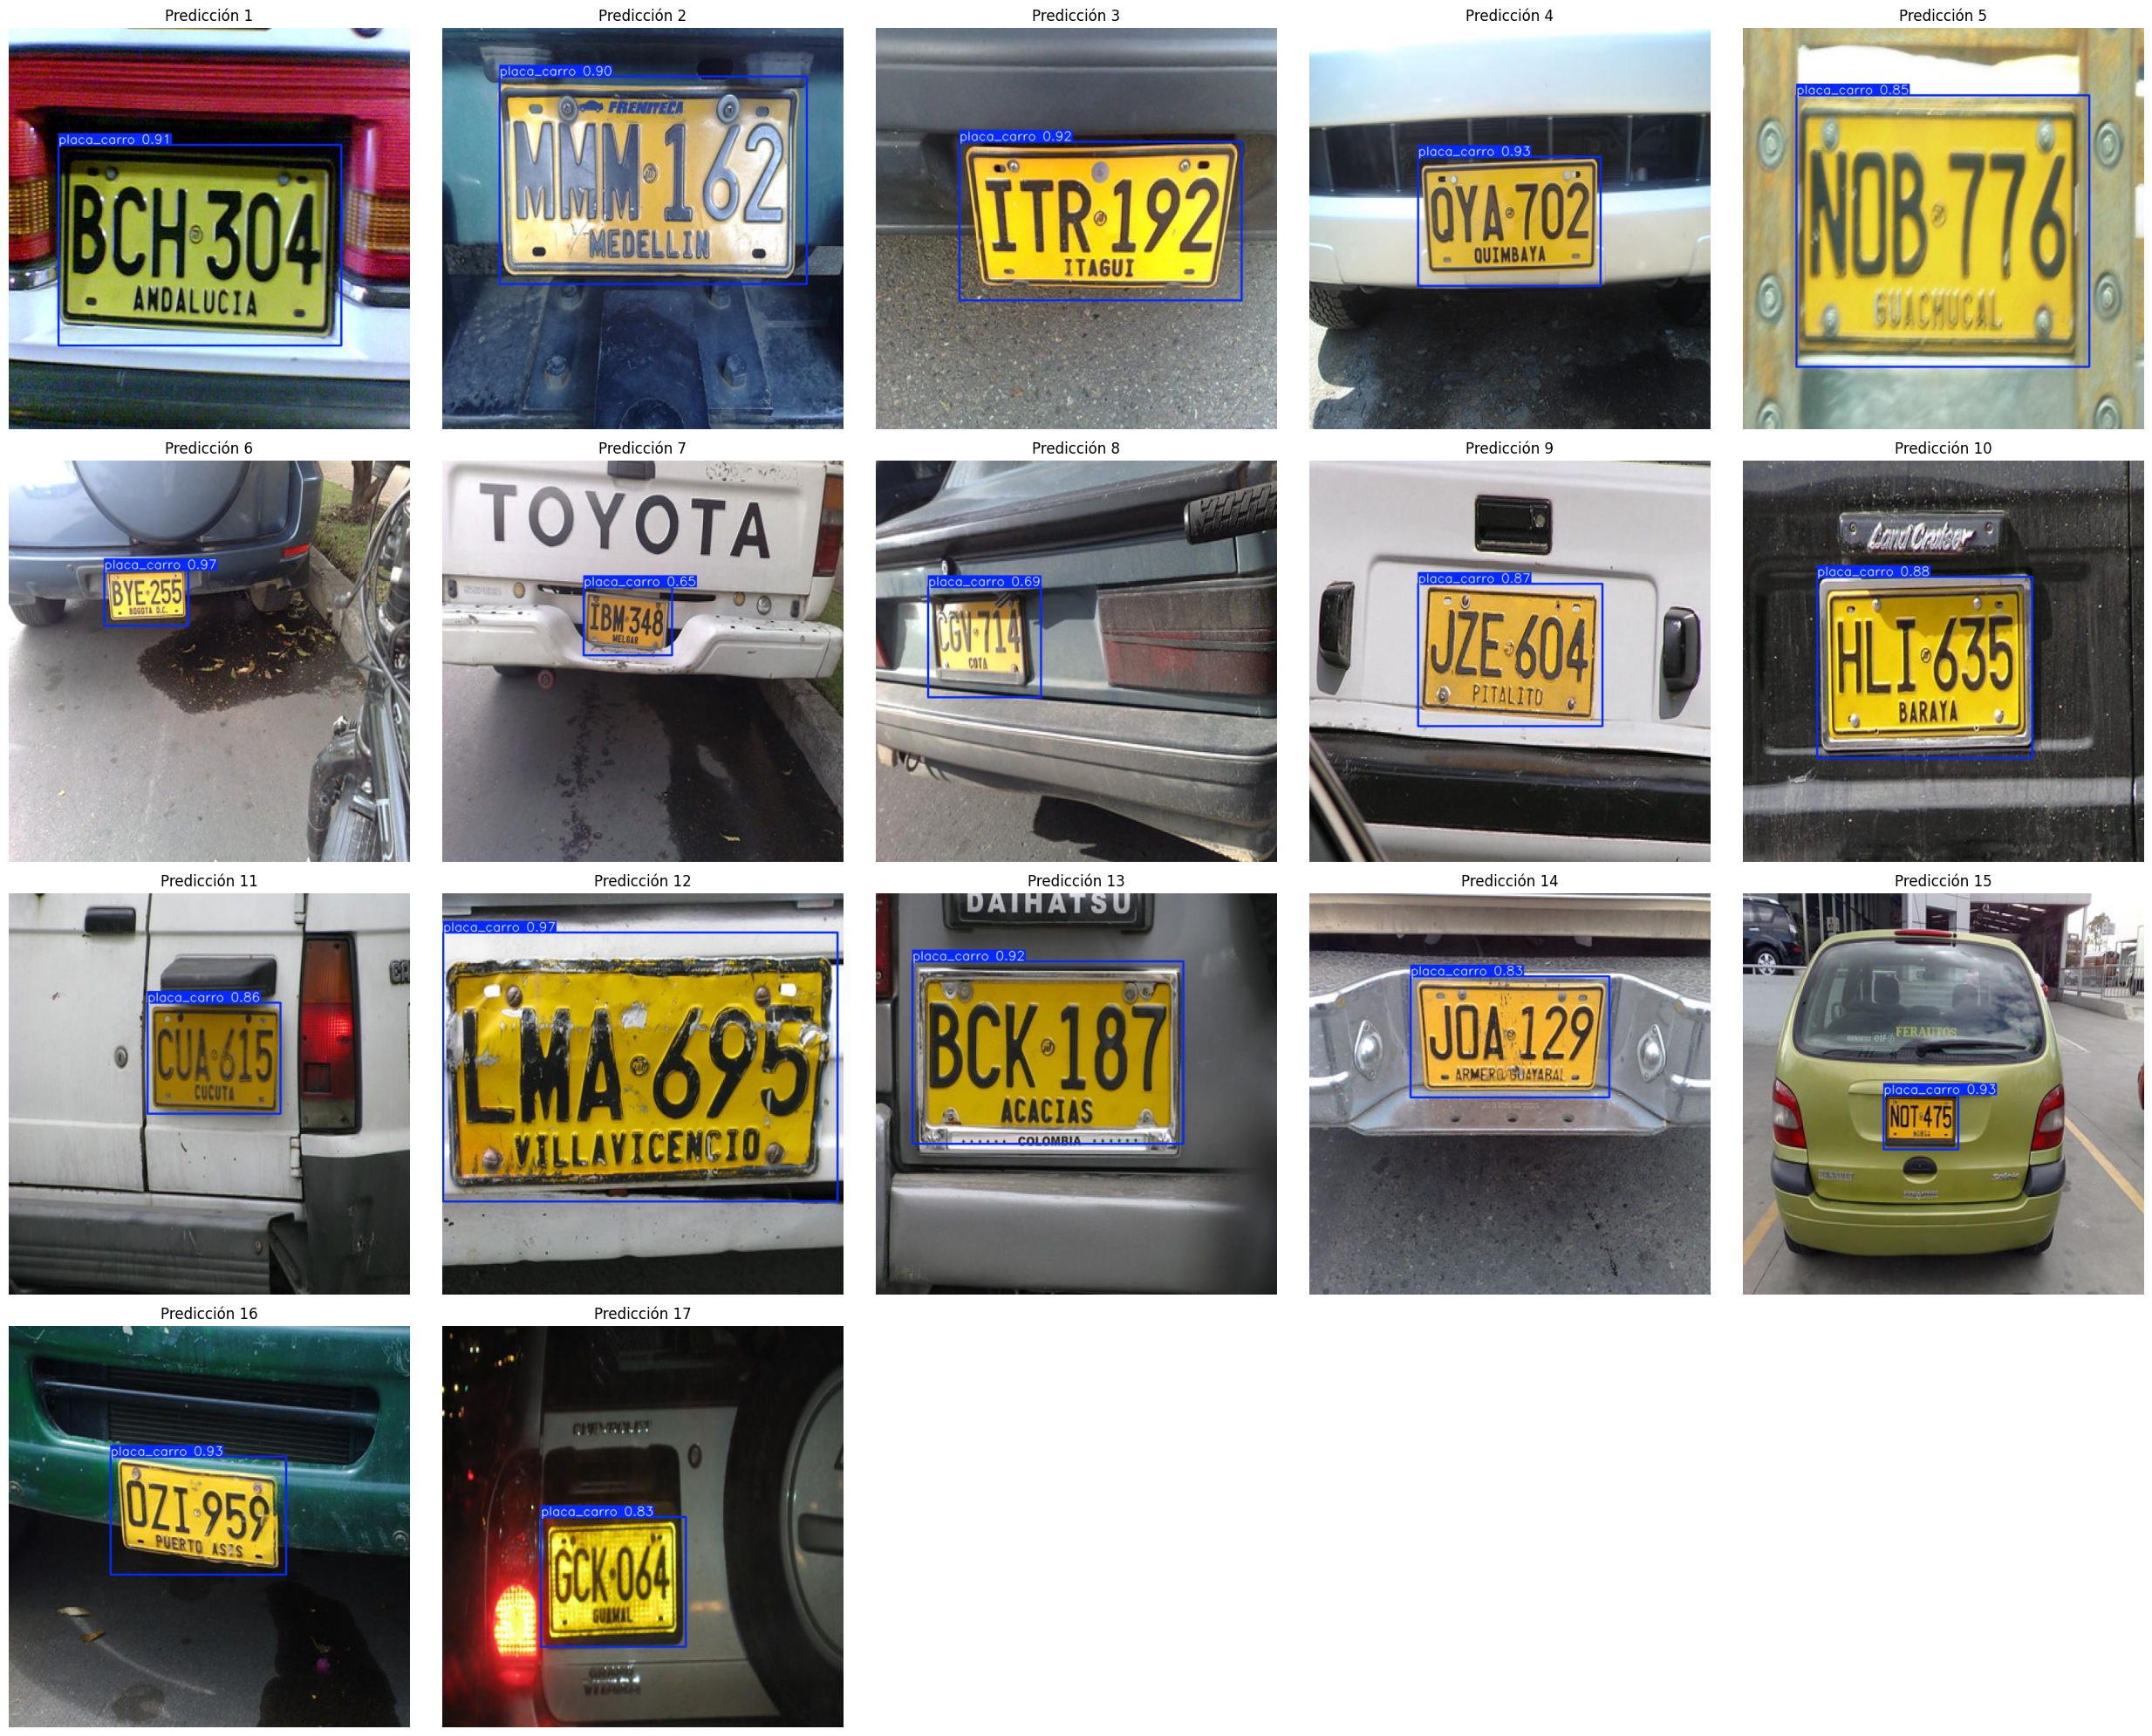

In [ ]:
# 3. Definir grilla automáticamente (cuadrada)
n = len(predicciones)
cols = int(math.ceil(math.sqrt(n)))
rows = int(math.ceil(n / cols))

plt.figure(figsize=(5 * cols, 5 * rows))

# 4. Mostrar cada imagen en la grilla
for i, res in enumerate(predicciones):
    img = res.plot()[..., ::-1]  # convierte BGR -> RGB para matplotlib

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicción {i+1}")

plt.tight_layout()
plt.show()

# 8 – Predicción sobre una imagen específica

En esta celda se corre el modelo entrenado sobre **una sola imagen** del dataset de entrenamiento.
Esto permite inspeccionar resultados de manera puntual.

In [22]:
predicciones = modelo_entrenado("/Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/train/images/images_png.rf.712794a36ee2f25292a12fb931a13e61.jpg")


image 1/1 /Users/pipepatino/Desktop/Portafolio/Pruebas_Tecnicas/Yamaha_v1/YOLO/dataset_yolo/train/images/images_png.rf.712794a36ee2f25292a12fb931a13e61.jpg: 640x640 1 placa_moto, 182.7ms
Speed: 26.3ms preprocess, 182.7ms inference, 24.9ms postprocess per image at shape (1, 3, 640, 640)
